# FIFA Analysis
## Objective of this Analysis:
#### Analysis of Which year has Maximum attendance in FIFA
#### Which Country has Hosted Maximum times FIFA
#### Teams with the Most World Cup Victories
#### Comparison of France and Croatia 

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import io
from matplotlib import rc,animation
from mpl_toolkits.mplot3d import Axes3D
import os

In [93]:
matches_df  = pd.read_csv('WorldCupMatches.csv')
players_df  = pd.read_csv('WorldCupPlayers.csv')
cups_df     = pd.read_csv('WorldCups.csv')

In [94]:
matches_df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [95]:
matches_df.shape

(4572, 20)

In [96]:
matches_df.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


#### Here we see that in matches_df (dataset) there are 4572 rows and 20 columns which describes about the all World Cup Matches played between 1930-2014.

In [97]:
players_df.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [98]:
players_df.describe()

,RoundID,MatchID,Shirt Number
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


In [86]:
players_df.shape

(37784, 9)

#### Here in players_df (dataset) we caonclude that there are 37784 rows and 9 columns which describe about each player who played in FIFA and with this all details like(Team,Coach) 

In [87]:
cups_df.head(20)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [88]:
cups_df.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [89]:
cups_df.shape

(20, 10)

#### Here in cups_df (dataset) we conclude that there are 20 rows and 10 columns which describes about that Overall details of FIFA Worldcup of each Season it shows about Year of WorldCup, In which Country it Held, Winner, Runner-Ups, Third and Fourth Position ,Total Goals, Matches Played and Attendance

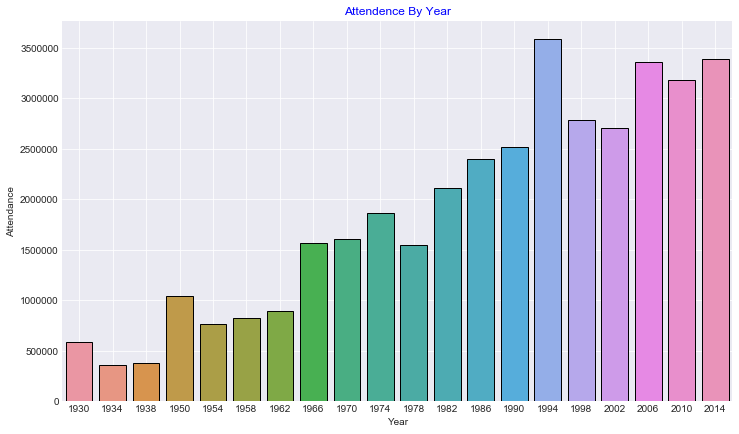

In [91]:
matches_df.isnull().sum()
sns.set_style("darkgrid")

#removing duplicate rows for match id column 
matches_df = matches_df.drop_duplicates(subset="MatchID",keep="first")

#removing null values
matches = matches_df[matches["Year"].notnull()]

att = matches_df.groupby("Year")["Attendance"].sum().reset_index()
att["Year"] = att["Year"].astype(int)
plt.figure(figsize=(12,7))
sns.barplot(att["Year"],att["Attendance"],linewidth=1,edgecolor="k"*len(att))
plt.grid(True)
plt.title("Attendence By Year",color='b')
plt.show()

#### From this we analyse that in year 1994 there is maximum attendance and it is held in United States(US) and in year 1934 there is  minimum attendance and is held in Italy.

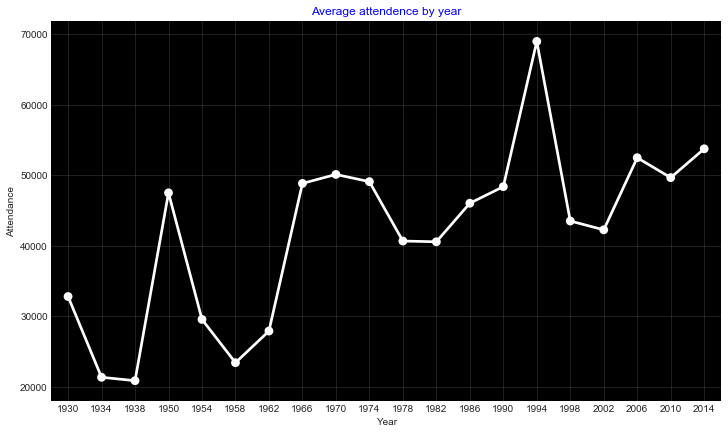

In [22]:
att1 = matches_df.groupby("Year")["Attendance"].mean().reset_index()
att1["Year"] = att1["Year"].astype(int)
plt.figure(figsize=(12,7))
ax = sns.pointplot(att1["Year"],att1["Attendance"],color="w")
ax.set_facecolor("k")
plt.grid(True,color="grey",alpha=.3)
plt.title("Average attendence by year",color='b')
plt.show()

#### From this we analyse that a total of 3.4 million people watched the 64 games of  2014 FIFA World Cup in Brazil. From this we say that the average attendance per game was 53,758 , the highest average since the 1994 World Cup in the United States where average attendance is 68,000 per game.

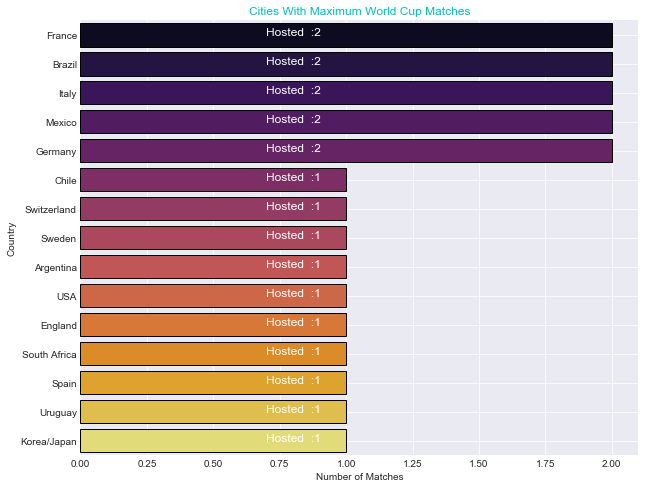

In [38]:
mat_c = cups_df["Country"].value_counts().reset_index()
plt.figure(figsize=(10,8))
ax = sns.barplot(y=mat_c["index"][:20],x = mat_c["Country"][:20],palette="inferno",
                 linewidth=1,edgecolor="K"*15)
plt.xlabel("Number of Matches")
plt.ylabel("Country")
plt.grid(True)
plt.title("Cities With Maximum World Cup Matches",color='c')

for i,j in enumerate("Hosted  :" + mat_c["Country"][:20].astype(str)):
    ax.text(.7,i,j,fontsize = 12,color="w")
plt.show()

#### Countries Which Hosted Highest WorldCup Matches :
#### Is shows that France,Brazil,Italy,Mexico,Germany has Hosted 2 times while Chile,Switzerland,Sweden,Argentina,USA,England,South Africa,Spain,Uruguay,Japan ahs hosted 1 times.

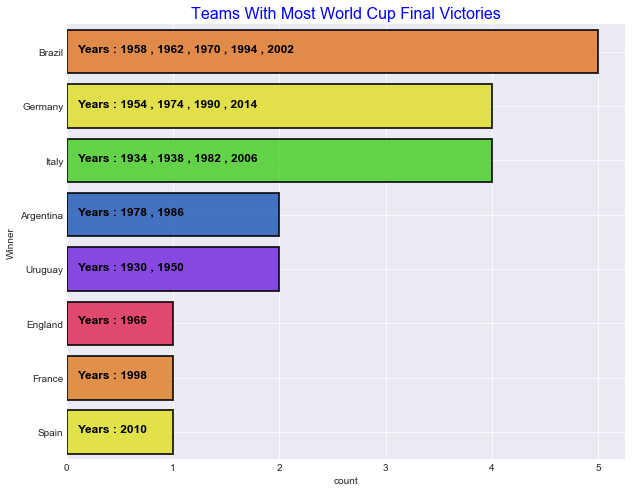

In [30]:
cups_df["Winner"]=cups_df["Winner"].replace("Germany FR","Germany")
cups_df["Runners-Up"]=cups_df["Runners-Up"].replace("Germany FR","Germany")
cups_df["Yr"] = cups_df["Year"].astype(str)
c1  = cups_df.groupby("Winner")["Yr"].apply(" , ".join).reset_index()
c2  = cups_df.groupby("Winner")['Year'].count().reset_index()
c12 = c1.merge(c2,left_on="Winner",right_on="Winner",how="left")
c12 = c12.sort_values(by = "Year",ascending =False)

plt.figure(figsize=(10,8))
ax = sns.barplot("Year","Winner",data=c12,palette="prism",alpha=.8,linewidth=2,edgecolor="k"*len(c12))

for i,j in enumerate("Years : " + c12["Yr"]):
    ax.text(.1,i,j,weight = "bold",fontsize = 12,color='Black')

plt.title("Teams With Most World Cup Final Victories",color='Blue',fontsize=16)
plt.grid(True)
plt.xlabel("count")
plt.show()

#### From this we say  Brazil have won five times. Germany and Italy, with four titles each,Argentina and Uruguay with two titles each and England, France, and Spain with one title each.

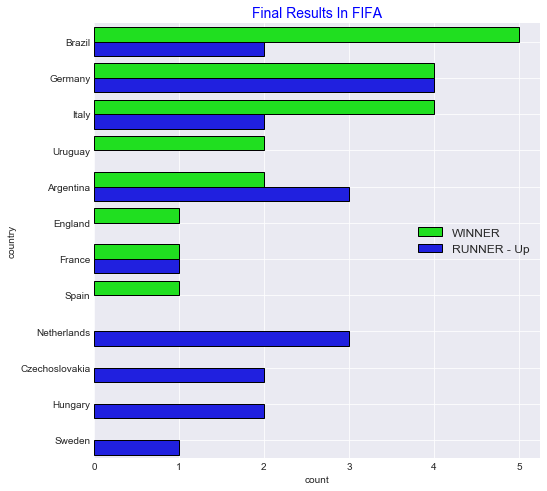

In [63]:
cou = cups_df["Winner"].value_counts().reset_index()
cou_w = cou.copy()
cou_w.columns = ["country","count"]
cou_w["type"] = "WINNER"

cou_r = cups_df["Runners-Up"].value_counts().reset_index()
cou_r.columns = ["country","count"]
cou_r["type"] = "RUNNER - Up"

cou_t = pd.concat([cou_w,cou_r],axis=0)

plt.figure(figsize=(8,8))
sns.barplot("count","country",data=cou_t,
            hue="type",palette=["lime","b"],
            linewidth=1,edgecolor="k"*len(cou_t))
plt.grid(True)
plt.legend(loc="center right",prop={"size":12})
plt.title("Final Results In FIFA",color='b',fontsize=14)
plt.show()

#### From this we analyse that Brazil has the Maximum win in Finals 5 and only 2 times Runners-Up in Final while analysing to France:
#### France has reached only Two Times in FIFA Final and 1 time Winner and 1 time Runners-Up

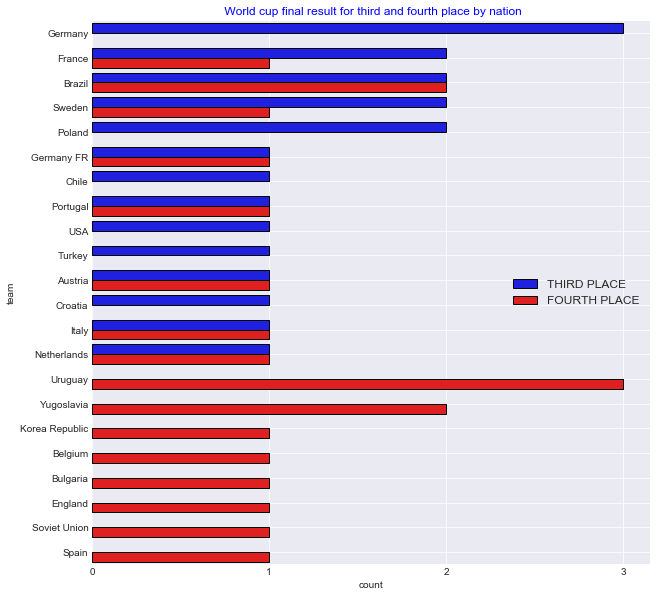

In [66]:
third = cups_df["Third"].value_counts().reset_index()
third.columns = ["team","count"]
third["type"] = "THIRD PLACE"

fourth = cups_df["Fourth"].value_counts().reset_index()
fourth.columns = ["team","count"]
fourth["type"] = "FOURTH PLACE"

places = pd.concat([third,fourth],axis=0)

plt.figure(figsize=(10,10))
sns.barplot("count","team",data=plcs,hue="type",
           linewidth=1,edgecolor="k"*len(plcs),
           palette = ["blue","red"])
plt.grid(True)
plt.xticks(np.arange(0,4,1))
plt.title(" World cup final result for third and fourth place by nation",color='b')
plt.legend(loc="center right",prop={"size":12})
plt.show()

#### From this we analyse that Germany has qualify 3 times in 3rd position. 
### Croatia has qualify only one time in 3rd position.
## This is the First Time Croatia qualify for Finals.
# While France has qualify two times earlier in FIFA Final.